# 허깅페이스 오디오 미션 4

## 개요
- [미션 링크](https://huggingface.co/learn/audio-course/chapter6/hands_on)
- [KSS Dataset 데이터셋](https://huggingface.co/datasets/Bingsu/KSS_Dataset)  

## 데이터 전처리

In [2]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.8 MB/s eta 0:00:00


In [4]:
!pip install speechbrain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 kB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.2/788.2 kB 58.1 MB/s eta 0:00:00


In [9]:
!pip install --upgrade torch torchaudio torchvision \
--index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.4/780.4 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 478.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188

In [6]:
!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.7.0 torchvision= 0.22.0 torchaudio==2.7.0 --index-url https://download.pytorch.org/whl/cu126


Found existing installation: torch 2.9.0+cu126
Uninstalling torch-2.9.0+cu126:
  Successfully uninstalled torch-2.9.0+cu126
Found existing installation: torchvision 0.24.0+cu126
Uninstalling torchvision-0.24.0+cu126:
  Successfully uninstalled torchvision-0.24.0+cu126
Found existing installation: torchaudio 2.9.0+cu126
Uninstalling torchaudio-2.9.0+cu126:
  Successfully uninstalled torchaudio-2.9.0+cu126
Looking in indexes: https://download.pytorch.org/whl/cu126
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.8/866.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 138.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 120.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5

In [1]:
# 라이브러리 가져오기
import numpy as np
import io
import matplotlib.pyplot as plt
from pathlib import Path
from dataclasses import dataclass
from functools import partial
from collections import defaultdict
import evaluate
import inspect
from typing import Any, Dict, List, Union

# 파이토치 관련 라이브러리
import torch, torchaudio
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence
from torch.optim import AdamW
from torch.optim.lr_scheduler import LambdaLR
from tqdm.auto import tqdm

# 음악 관련 라이브러리
import librosa
import librosa.display
from datasets import Audio, load_dataset, DatasetDict
from speechbrain.pretrained import EncoderClassifier
from transformers import pipeline, Wav2Vec2FeatureExtractor, WavLMForXVector, Seq2SeqTrainer, Seq2SeqTrainingArguments
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech, SpeechT5HifiGan
from transformers.models.whisper.english_normalizer import BasicTextNormalizer
import sentencepiece
import soundfile as sf

# 허깅페이스 업로드
import huggingface_hub
from huggingface_hub import notebook_login
from huggingface_hub import HfApi

# 음악 듣기용
from IPython.display import Audio as Au

# 그라디오 라이브러리
import gradio as gr

DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _speechbrain_save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _speechbrain_load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _recover
/tmp/ipython-input-386085313.py:25: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  from speechbrain.pretrained import EncoderClassifier


In [2]:
!nvidia-smi

Fri Dec  5 09:53:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P0             44W /  400W |       5MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [3]:
import torch
print(torch.__version__)

2.7.0+cu126


In [4]:
# 허깅페이스 허브 로그인
notebook_login()

In [5]:
# 상수 변수 정의
class Config:
    # 디바이스 변수
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # 폴더 경로
    ROOT = Path(".")
    MODEL_DIR = ROOT / "speecht5-tts-korean"

    # 시드값
    SEED = 42

    # 배치 값
    BATCH_SIZE = 4

In [6]:
# 폴더 생성
Config.MODEL_DIR.mkdir(parents=True, exist_ok=True)

In [7]:
# 데이터셋 로드
kss = load_dataset("Bingsu/KSS_Dataset")

# 자동 디코딩 제거
kss = kss.cast_column("audio", Audio(decode=False))

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [8]:
# 데이터셋 구조 확인
kss["train"]["audio"]

Output hidden; open in https://colab.research.google.com to view.

In [9]:
def load_audio_from_hf(example):
    audio_info = example["audio"]

    # path가 존재하면 경로에서 로딩
    if audio_info.get("path", None) is not None:
        waveform, sr = torchaudio.load(audio_info["path"])
        return waveform, sr

    # path가 없으면 bytes에서 로딩
    if audio_info.get("bytes", None) is not None:
        byte_data = audio_info["bytes"]
        buffer = io.BytesIO(byte_data)
        waveform, sr = torchaudio.load(buffer)
        return waveform, sr

    raise ValueError("This audio sample has neither 'path' nor 'bytes'.")

In [10]:
item = kss["train"][0]
waveform, sr = load_audio_from_hf(item)

print(waveform.shape, sr)

torch.Size([2, 155520]) 44100


In [11]:
Au(waveform.squeeze().numpy(), rate=sr)

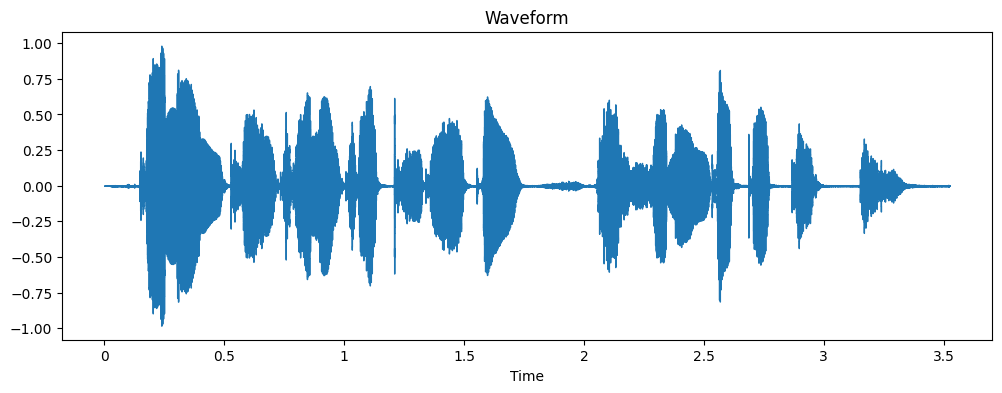

In [12]:
# 파형 시각화
plt.figure(figsize=(12,4))
librosa.display.waveshow(waveform.squeeze().numpy(), sr=sr)
plt.title("Waveform")
plt.show()

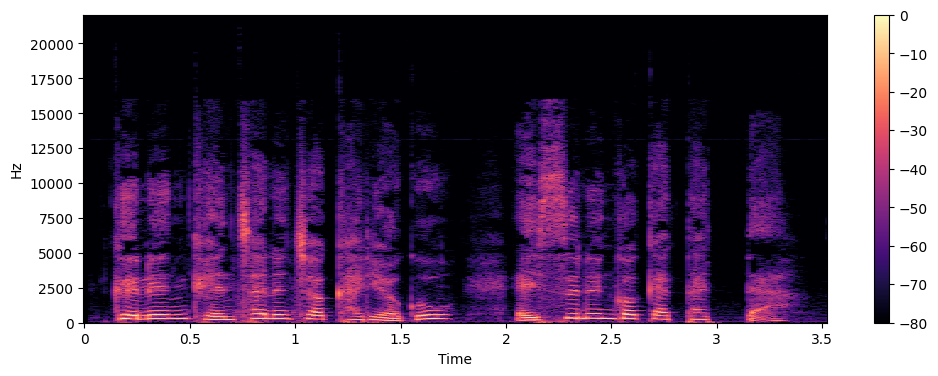

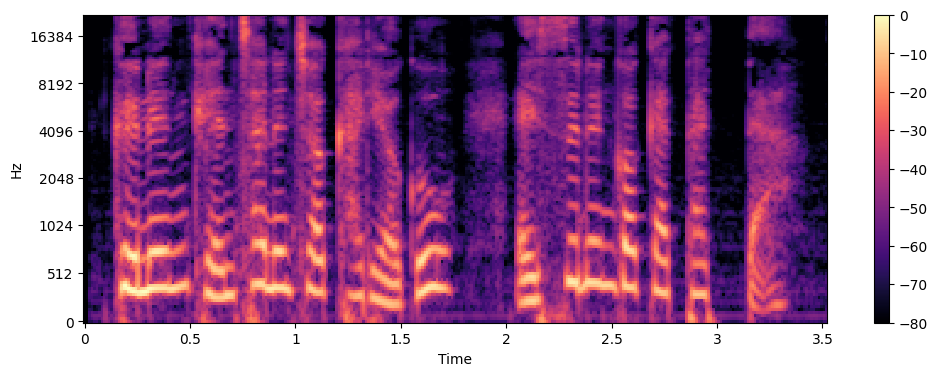

In [13]:
# STFT / 멜 스펙토그램 시각화
signal = librosa.to_mono(waveform.numpy())

D = librosa.stft(signal)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(12,4))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar()
plt.show()

mel = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=128, fmax=8000)
mel_db = librosa.power_to_db(mel, ref=np.max)

plt.figure(figsize=(12,4))
librosa.display.specshow(mel_db, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar()
plt.show()


In [14]:
def safe_waveform(waveform):
    """
    waveform을 항상 1D float32 numpy array로 맞추고
    비정상 샘플(길이 0, float 값 등)을 자동으로 처리.
    """

    # torchaudio.load() 결과가 Tensor일 경우 numpy로 변환
    if "numpy" in str(type(waveform)):
        arr = waveform
    else:
        arr = waveform.numpy()

    # 다차원일 경우 (channels, samples) → mono flatten
    if arr.ndim > 1:
        arr = arr.mean(axis=0)

    # 길이가 0이면 1-sample dummy 생성 (HF Datasets는 빈 array 불가)
    if arr.size == 0:
        arr = np.zeros(1, dtype=np.float32)

    # float가 들어온 경우 강제 변환
    if isinstance(arr, float) or isinstance(arr, int):
        arr = np.array([float(arr)], dtype=np.float32)

    return arr.astype(np.float32)


In [15]:
def load_and_resample(batch, target_sr=16000):
    waveform, sr = load_audio_from_hf(batch)

    # 배열 형변환 안전 처리
    waveform = safe_waveform(waveform.squeeze())

    # 리샘플링
    if sr != target_sr and waveform.size > 1:
        waveform = torchaudio.functional.resample(
            torch.tensor(waveform).unsqueeze(0), sr, target_sr
        ).squeeze().numpy()

    # 다시 한번 안전 보정
    batch["waveform"] = safe_waveform(waveform)
    return batch


In [16]:
kss_modified = kss.map(load_and_resample, num_proc=4)
kss_modified = kss_modified["train"]

In [17]:
# 전처리기, 모델 초기화
checkpoint = "microsoft/speecht5_tts"
processor = SpeechT5Processor.from_pretrained(checkpoint)
model = SpeechT5ForTextToSpeech.from_pretrained(checkpoint)


# 모델을 GPU 디바이스로 이동
model = model.to(Config.DEVICE)

# 모델 설정: Guided Attention Loss 활성화
model.config.use_guided_attn_loss = True

In [18]:
# 토크나이저 초기화
tokenizer = processor.tokenizer

In [19]:
# 모든 문자 추출용 함수 작성
def extract_unique_characters(batch):
    all_text = " ".join(batch["decomposed_script"])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}

In [20]:
vocabs = kss_modified.map(
                          extract_unique_characters,
                          batched=True,
                          batch_size=-1,
                          keep_in_memory=True,
                          remove_columns=kss_modified.column_names
                          )

Map:   0%|          | 0/12854 [00:00<?, ? examples/s]

In [21]:
vocabs

Dataset({
    features: ['vocab', 'all_text'],
    num_rows: 1
})

In [22]:
dataset_vocab = set(vocabs["vocab"][0])

In [23]:
tokenizer_vocab = {k for k, _ in tokenizer.get_vocab().items()}
tokenizer

SpeechT5Tokenizer(name_or_path='microsoft/speecht5_tts', vocab_size=79, model_max_length=600, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	79: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=True, special=True),
	80: AddedToken("<ctc_blank>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
}
)

In [24]:
tokenizer_vocab

{'!',
 '"',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '</s>',
 '<ctc_blank>',
 '<mask>',
 '<pad>',
 '<s>',
 '<unk>',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 ']',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '}',
 'æ',
 'é',
 'ê',
 'œ',
 '̄',
 '—',
 '▁'}

In [25]:
# 토크나이저에 없는 고유 문자 추출
missing_chars = dataset_vocab - tokenizer_vocab
missing_chars

{' ',
 'ᄀ',
 'ᄁ',
 'ᄂ',
 'ᄃ',
 'ᄄ',
 'ᄅ',
 'ᄆ',
 'ᄇ',
 'ᄈ',
 'ᄉ',
 'ᄊ',
 'ᄋ',
 'ᄌ',
 'ᄍ',
 'ᄎ',
 'ᄏ',
 'ᄐ',
 'ᄑ',
 'ᄒ',
 'ᅡ',
 'ᅢ',
 'ᅣ',
 'ᅤ',
 'ᅥ',
 'ᅦ',
 'ᅧ',
 'ᅨ',
 'ᅩ',
 'ᅪ',
 'ᅫ',
 'ᅬ',
 'ᅭ',
 'ᅮ',
 'ᅯ',
 'ᅰ',
 'ᅱ',
 'ᅲ',
 'ᅳ',
 'ᅴ',
 'ᅵ',
 'ᆨ',
 'ᆩ',
 'ᆪ',
 'ᆫ',
 'ᆬ',
 'ᆭ',
 'ᆮ',
 'ᆯ',
 'ᆰ',
 'ᆱ',
 'ᆲ',
 'ᆴ',
 'ᆶ',
 'ᆷ',
 'ᆸ',
 'ᆹ',
 'ᆺ',
 'ᆻ',
 'ᆼ',
 'ᆽ',
 'ᆾ',
 'ᆿ',
 'ᇀ',
 'ᇁ',
 'ᇂ',
 '가',
 '각',
 '갈',
 '같',
 '개',
 '거',
 '겠',
 '결',
 '경',
 '고',
 '골',
 '공',
 '과',
 '그',
 '기',
 '길',
 '까',
 '끊',
 '끔',
 '끝',
 '나',
 '넘',
 '넷',
 '노',
 '는',
 '니',
 '다',
 '닦',
 '달',
 '닭',
 '대',
 '더',
 '도',
 '독',
 '들',
 '때',
 '떡',
 '뜨',
 '라',
 '람',
 '럿',
 '력',
 '로',
 '를',
 '릅',
 '마',
 '말',
 '맛',
 '먹',
 '면',
 '못',
 '문',
 '바',
 '번',
 '벌',
 '분',
 '불',
 '붓',
 '빈',
 '빠',
 '사',
 '생',
 '서',
 '석',
 '선',
 '성',
 '세',
 '셔',
 '셨',
 '숍',
 '수',
 '습',
 '시',
 '식',
 '쌩',
 '써',
 '아',
 '야',
 '어',
 '엄',
 '없',
 '었',
 '에',
 '여',
 '였',
 '옆',
 '오',
 '와',
 '왼',
 '요',
 '우',
 '운',
 '위',
 '으',
 '은',
 '을',
 '의',
 '이',
 '인',
 '일',
 '임'

In [26]:
missing_chars_list = sorted(list(missing_chars - {" "}))
# 문자들을 토크나이저에 추가
num_added = tokenizer.add_tokens(missing_chars_list)
num_added

208

In [27]:
# 모델 임베딩 크기 재설정
model.resize_token_embeddings(len(tokenizer))

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


Embedding(289, 768, padding_idx=1)

In [28]:
# 화자 임베딩용 xvector 모델 생성
spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda" if torch.cuda.is_available() else "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=Config.MODEL_DIR / spk_model_name,
)

INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Using symlink found at '/content/speecht5-tts-korean/speechbrain/spkrec-xvect-voxceleb/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-xvect-voxceleb' if not cached
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _load
DEBUG:speechbrain.utils.checkpoints:Registered parameter transfer hook for _load
/usr/local/lib/python3.12/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load_if_possible
DEBUG:speechbrain.uti

In [29]:
# 화자 임베딩 함수 생성
def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings

In [30]:
# 화자 임베딩 추
def add_speaker_embedding(batch):
    waveform = batch["waveform"]
    spk_emb = create_speaker_embedding(waveform)
    batch["speaker_embeddings"] = spk_emb
    return batch

kss_modified = kss_modified.map(add_speaker_embedding)

In [31]:
# 전처리 함수 작성
def preprocess_function(example):
    waveform = example["waveform"]
    processed = processor(
        text=example["decomposed_script"],
        return_attention_mask=True,
    )

    processed_audio = processor(
        audio_target=waveform,
        sampling_rate=16000,
        truncation=True,
        max_length=512,
        padding="max_length",
    )
    processed["labels"] = processed_audio["input_values"][0]

    # embedding은 이미 사전 저장된 값을 사용
    processed["speaker_embeddings"] = example["speaker_embeddings"]

    return processed


In [32]:
# 샘플 하나 전처리 테스트
processed_sample = preprocess_function(kss_modified[0])
list(processed_sample.keys())

['input_ids', 'attention_mask', 'labels', 'speaker_embeddings']

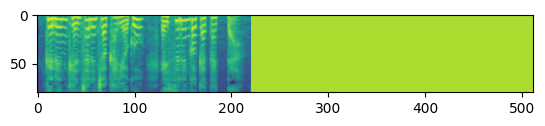

In [33]:
# 라벨 시각화
plt.figure()
plt.imshow(processed_sample["labels"].T)
plt.show()

In [34]:
# 데이터 전체에 적용
dataset = kss_modified.map(
    preprocess_function,
    remove_columns=kss_modified.column_names
)

Map:   0%|          | 0/12854 [00:00<?, ? examples/s]

In [35]:
dataset[0].keys()

dict_keys(['speaker_embeddings', 'input_ids', 'attention_mask', 'labels'])

In [36]:
# 시퀀스 길이로 필터링 함수 작성
def is_not_too_long(input_ids):
    return len(input_ids) < 200  # 필요하면 조절 가능

dataset = dataset.filter(is_not_too_long, input_columns=["input_ids"])
len(dataset)

Filter:   0%|          | 0/12854 [00:00<?, ? examples/s]

12854

In [37]:
# 훈련/평가 데이터셋 분리
tts_dataset = dataset.train_test_split(test_size=0.2, seed=Config.SEED)
tts_dataset

DatasetDict({
    train: Dataset({
        features: ['speaker_embeddings', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 10283
    })
    test: Dataset({
        features: ['speaker_embeddings', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 2571
    })
})

In [38]:
@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(self, features):

        # 1Text tokens 패딩
        input_ids = [{"input_ids": f["input_ids"]} for f in features]
        batch = self.processor.pad(
            input_ids=input_ids,
            return_tensors="pt",
        )

        # Mel padding을 직접 해야 한다
        labels = [torch.tensor(f["labels"]) for f in features]  # (n_mels, t)
        labels = pad_sequence(labels, batch_first=True, padding_value=-100.0)
        batch["labels"] = labels

        # Speaker embedding
        speaker_features = [torch.tensor(f["speaker_embeddings"]) for f in features]
        batch["speaker_embeddings"] = torch.stack(speaker_features)

        return batch


In [39]:
# data_collator 생성
data_collator = TTSDataCollatorWithPadding(processor)

In [40]:
tts_dataset["train"]

Dataset({
    features: ['speaker_embeddings', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 10283
})

In [41]:
# 데이터로더 생성
train_dataloader = DataLoader(
    tts_dataset["train"],
    batch_size=Config.BATCH_SIZE,
    shuffle=True,
    collate_fn=data_collator,
    num_workers=4,
    pin_memory=True,
    drop_last=True
)

val_dataloader = DataLoader(
    tts_dataset["test"],
    batch_size=Config.BATCH_SIZE,
    shuffle=False,
    collate_fn=data_collator,
    num_workers=4,
    pin_memory=True,
    drop_last=False
)

In [42]:
batch = next(iter(train_dataloader))
for k, v in batch.items():
    print(k, type(v), v.shape, v.dtype)

input_ids <class 'torch.Tensor'> torch.Size([4, 41]) torch.int64
attention_mask <class 'torch.Tensor'> torch.Size([4, 41]) torch.int64
labels <class 'torch.Tensor'> torch.Size([4, 512, 80]) torch.float32
speaker_embeddings <class 'torch.Tensor'> torch.Size([4, 512]) torch.float32


In [43]:
batch = next(iter(train_dataloader))
print(batch["labels"].shape)

torch.Size([4, 512, 80])


In [44]:
# 최적화 알고리즘 생성
optimizer = AdamW(model.parameters(), lr=1e-4, weight_decay=1e-2)

In [45]:
# warmup 스케줄러 생성
num_epochs = 10
num_training_steps = num_epochs * len(train_dataloader)
warmup_steps = int(0.2 * num_training_steps)

def lr_lambda(current_step: int):
    if current_step < warmup_steps:
        return float(current_step) / float(max(1, warmup_steps))
    return 1.0

lr_scheduler = LambdaLR(optimizer, lr_lambda=lr_lambda)

In [46]:
# 혼합 정밀도
scaler = torch.cuda.amp.GradScaler()

/tmp/ipython-input-2666261267.py:2: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


In [ ]:
best_val_loss = float("inf")         # 가장 낮은 검증 손실을 저장해두는 변수

# 에폭 단위 훈련 루프
for epoch in range(1, num_epochs + 1):

    # Train Phase
    model.train() # 모델을 학습 모드로 전환 (Dropout, LayerNorm 등 활성)
    train_loss = 0.0 # 에폭 동안의 누적 학습 손실
    train_steps = 0 # 에폭 동안 처리한 배치 수

    # tqdm으로 진행률 바 생성
    pbar_train = tqdm(train_dataloader, desc=f"Epoch {epoch} [Train]")

    for batch in pbar_train:
        # 배치를 GPU/CPU(Device)로 옮기기
        # batch는 dict 형태: {"input_ids": ..., "labels": ..., "speaker_embeddings": ...}
        # v.to(Config.DEVICE): 텐서를 지정한 장치(cuad/CPU)로 전송
        batch = {k: v.to(Config.DEVICE) for k, v in batch.items()}

        # 매 step마다 이전 step의 gradient 초기화
        optimizer.zero_grad()

        # 혼합 정밀도(Automatic Mixed Precision) 사용
        # - device_type=Config.DEVICE.type: "cuda" 또는 "cpu"
        # - enabled=True 로 해야 실제로 FP16 연산이 적용됨
        # - GPU에서 연산량과 메모리 사용량을 크게 줄여서 속도 향상
        with torch.amp.autocast(device_type=Config.DEVICE.type, enabled=True):
            outputs = model(
                input_ids=batch["input_ids"],
                attention_mask=batch["attention_mask"],
                labels=batch["labels"],
                speaker_embeddings=batch["speaker_embeddings"],
            )
            loss = outputs.loss  # 현재 배치에 대한 손실 값 (스칼라)

        # GradScaler를 이용해 FP16에서 안정적으로 역전파
        # - loss를 스케일링해서 underflow 방지
        # - scale().backward() → step() → update() 순서 필수
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # 스케줄러가 있다면 한 step마다 호출
        if lr_scheduler is not None:
            lr_scheduler.step()

        # 손실 누적 및 스텝 수 증가
        train_loss += loss.item()
        train_steps += 1

        # tqdm 진행률 바에 평균 손실 표시
        avg_train_loss = train_loss / train_steps
        pbar_train.set_postfix({"loss": f"{avg_train_loss:.4f}"})

    # 한 에폭이 끝난 후의 평균 학습 손실
    avg_train_loss = train_loss / train_steps

    # Validation Phase
    model.eval()                  # 모델을 평가 모드로 전환 (Dropout 비활성화 등)
    val_loss = 0.0
    val_steps = 0

    # 검증 데이터셋용 tqdm 진행률 바
    pbar_val = tqdm(val_dataloader, desc=f"Epoch {epoch} [Val]")

    # 검증 시에는 gradient 계산이 필요 없으므로 no_grad()
    with torch.no_grad():
        for batch in pbar_val:
            # 배치를 장치로 전송
            batch = {k: v.to(Config.DEVICE) for k, v in batch.items()}


            # 검증에서도 AMP를 켜주면 연산이 더 빨라짐
            # (역전파를 하지 않기 때문에 scaler는 필요 없음)

            with torch.amp.autocast(device_type=Config.DEVICE.type, enabled=True):
                outputs = model(
                    input_ids=batch["input_ids"],
                    attention_mask=batch["attention_mask"],
                    labels=batch["labels"],
                    speaker_embeddings=batch["speaker_embeddings"],
                )
                loss = outputs.loss

            val_loss += loss.item()
            val_steps += 1

            # 진행률 바에 현재까지의 검증 평균 손실 표시
            pbar_val.set_postfix({"loss": f"{val_loss / val_steps:.4f}"})

    avg_val_loss = val_loss / val_steps
    # 에폭별 결과
    print(
        f"\nEpoch {epoch} | "
        f"train_loss = {avg_train_loss:.4f} | "
        f"val_loss = {avg_val_loss:.4f}"
    )

    # Best 모델 갱신 (Early Stopping/Checkpoint 용)
    # 검증 손실이 지금까지 중 가장 낮으면 모델
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), "speecht5-tts-korean/speecht5_kss.pth")
        print(f"모델 저장! val_loss = {best_val_loss:.4f}\n")

Epoch 1 [Train]:   0%|          | 0/2570 [00:00<?, ?it/s]

Epoch 1 [Val]:   0%|          | 0/643 [00:00<?, ?it/s]


Epoch 1 | train_loss = 0.4198 | val_loss = 0.2544
모델 저장! val_loss = 0.2544



Epoch 2 [Train]:   0%|          | 0/2570 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x783ecb3945e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1646, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x783ecb3945e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

Epoch 2 [Val]:   0%|          | 0/643 [00:00<?, ?it/s]


Epoch 2 | train_loss = 0.2707 | val_loss = 0.2499
모델 저장! val_loss = 0.2499



Epoch 3 [Train]:   0%|          | 0/2570 [00:00<?, ?it/s]

Epoch 3 [Val]:   0%|          | 0/643 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x783ecb3945e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1646, in _shutdown_workers
if w.is_alive():    
       ^^Exception ignored in: ^<function _MultiProcessingDataLoaderIter.__del__ at 0x783ecb3945e0>^^^
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1663, in __del__
^    self._shutdown_workers()
^  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1646, in _shutdown_workers
^    ^if w.is_alive():^
^ 
 
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
      assert self._parent_pid == os.getpid(), 'can only test a child process'    ^^   ^ ^ ^  ^^  ^ ^^^^Exception ign


Epoch 3 | train_loss = 0.2673 | val_loss = 0.2501


Epoch 4 [Train]:   0%|          | 0/2570 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x783ecb3945e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1646, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x783ecb3945e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

Epoch 4 [Val]:   0%|          | 0/643 [00:00<?, ?it/s]


Epoch 4 | train_loss = 0.2585 | val_loss = 0.2524


Epoch 5 [Train]:   0%|          | 0/2570 [00:00<?, ?it/s]

Epoch 5 [Val]:   0%|          | 0/643 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x783ecb3945e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1646, in _shutdown_workers
    if w.is_alive():
Exception ignored in:  <function _MultiProcessingDataLoaderIter.__del__ at 0x783ecb3945e0> 
  Traceback (most recent call last):
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1663, in __del__
     self._shutdown_workers() 
^^  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1646, in _shutdown_workers
^    ^if w.is_alive():
^^ ^^ ^^ ^^ 
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process' 
    ^Exception ignored in: ^^^<functio


Epoch 5 | train_loss = 0.2457 | val_loss = 0.2457
모델 저장! val_loss = 0.2457



Epoch 6 [Train]:   0%|          | 0/2570 [00:00<?, ?it/s]

Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x783ecb3945e0>
Exception ignored in: Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    <function _MultiProcessingDataLoaderIter.__del__ at 0x783ecb3945e0><function _MultiProcessingDataLoaderIter.__del__ at 0x783ecb3945e0>self._shutdown_workers()


Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1646, in _shutdown_workers
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1663, in __del__
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1663, in __del__
        if w.is_alive():    self._shutdown_workers()
self._shutdown_workers()

  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1646, in 

Epoch 6 [Val]:   0%|          | 0/643 [00:00<?, ?it/s]


Epoch 6 | train_loss = 0.8107 | val_loss = 1.2462


Epoch 7 [Train]:   0%|          | 0/2570 [00:00<?, ?it/s]

Epoch 7 [Val]:   0%|          | 0/643 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x783ecb3945e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1646, in _shutdown_workers
    Exception ignored in: if w.is_alive():<function _MultiProcessingDataLoaderIter.__del__ at 0x783ecb3945e0>
 
 Traceback (most recent call last):
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1663, in __del__
       self._shutdown_workers() ^^
^  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1646, in _shutdown_workers
^^^    ^if w.is_alive():^
 ^^ ^ ^ 
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
       assert self._parent_pid == os.getpid(), 'can only test a child process'^
^ ^ ^^^^ ^ ^  ^ ^ ^ 
  File "/usr/l


Epoch 7 | train_loss = 1.2644 | val_loss = 1.0521


Epoch 8 [Train]:   0%|          | 0/2570 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x783ecb3945e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    self._shutdown_workers()  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1646, in _shutdown_workers

    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x783ecb3945e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

Epoch 8 [Val]:   0%|          | 0/643 [00:00<?, ?it/s]


Epoch 8 | train_loss = 1.1665 | val_loss = 6.4593


Epoch 9 [Train]:   0%|          | 0/2570 [00:00<?, ?it/s]

Epoch 9 [Val]:   0%|          | 0/643 [00:00<?, ?it/s]


Epoch 9 | train_loss = nan | val_loss = nan


Epoch 10 [Train]:   0%|          | 0/2570 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x783ecb3945e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1646, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^Exception ignored in: ^<function _MultiProcessingDataLoaderIter.__del__ at 0x783ecb3945e0>^
^Traceback (most recent call last):
^  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1663, in __del__
^    ^self._shutdown_workers()^^^
^  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1646, in _shutdown_workers
^
    if w.is_alive():A

Epoch 10 [Val]:   0%|          | 0/643 [00:00<?, ?it/s]


Epoch 10 | train_loss = nan | val_loss = nan


In [ ]:
# 추론용 모델 로드
model.load_state_dict(torch.load("speecht5-tts-korean/speecht5_kss.pth"))
model.to(Config.DEVICE)
model.eval()

# vocoder 로드
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan").to(Config.DEVICE)

In [ ]:
vo_sr = vocoder.config.sampling_rate

min, max: -0.00039741013 0.0003890054


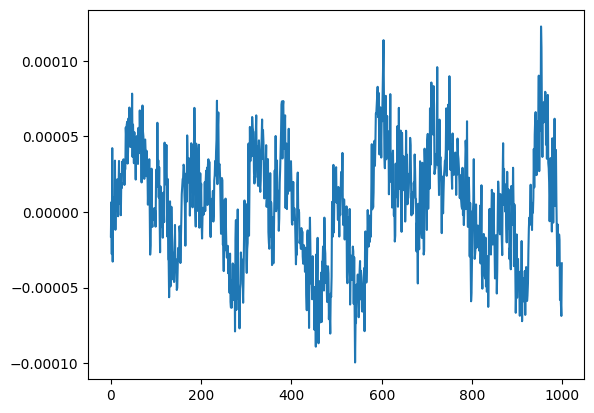

In [ ]:
# tts_dataset["train"] 안에 'speaker_embeddings'가 이미 들어 있음
ref_spk_np = tts_dataset["train"][0]["speaker_embeddings"]   # numpy array
ref_spk = torch.tensor(ref_spk_np, dtype=torch.float32, device=Config.DEVICE).unsqueeze(0)

# 테스트 텍스트
text = "안녕하세요. 위대한 햄스터를 목도하세요."

# 텍스트도 학습 때랑 동일하게 'script' 기준으로 처리
inputs = processor(text=text, return_tensors="pt").to(Config.DEVICE)

with torch.no_grad():
    speech = model.generate_speech(
        input_ids=inputs["input_ids"],
        speaker_embeddings=ref_spk,   # 0벡터 대신 실제 화자 임베딩
        vocoder=vocoder,
    )

waveform = speech.cpu().numpy()
sf.write("test_output.wav", waveform, vo_sr)
print("min, max:", waveform.min(), waveform.max())
plt.plot(waveform[:1000])
plt.show()


In [ ]:
Au(waveform, rate=vo_sr)

min, max: -0.00039741013 0.0003890054


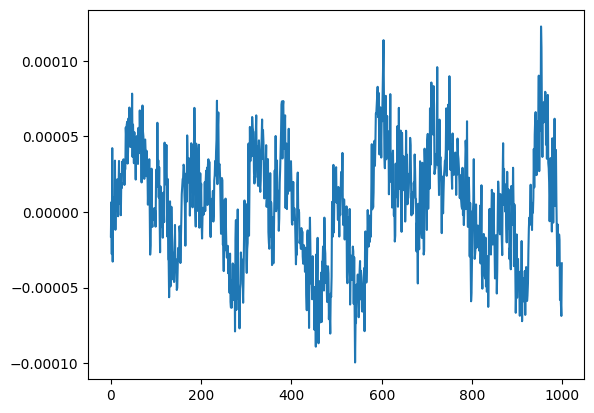

In [ ]:
w = waveform
print("min, max:", w.min(), w.max())
plt.plot(w[:1000])
plt.show()

In [ ]:
# 허깅페이스 업로드
hf_username = "ahnhs2k"
repo_name = "speecht5-kss"
repo_id = f"{hf_username}/{repo_name}"

api = HfApi()

# 리포 만들기 (이미 있으면 exist_ok=True)
api.create_repo(repo_id, exist_ok=True)

# 폴더 전체 업로드
api.upload_folder(
    repo_id=repo_id,
    folder_path=Config.MODEL_DIR,
    commit_message="Upload SpeechT5 Korean Jamo TTS (traditional PyTorch loop + WavLM-SV)",
)